In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [6]:
# Load the Iris dataset
iris = pd.read_csv("C:\\Users\\camil\\Documents\\Datascience IA\\Docs\\DataIA\\IRIS_ Flower_Dataset.csv")

In [7]:
# Check for missing values
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

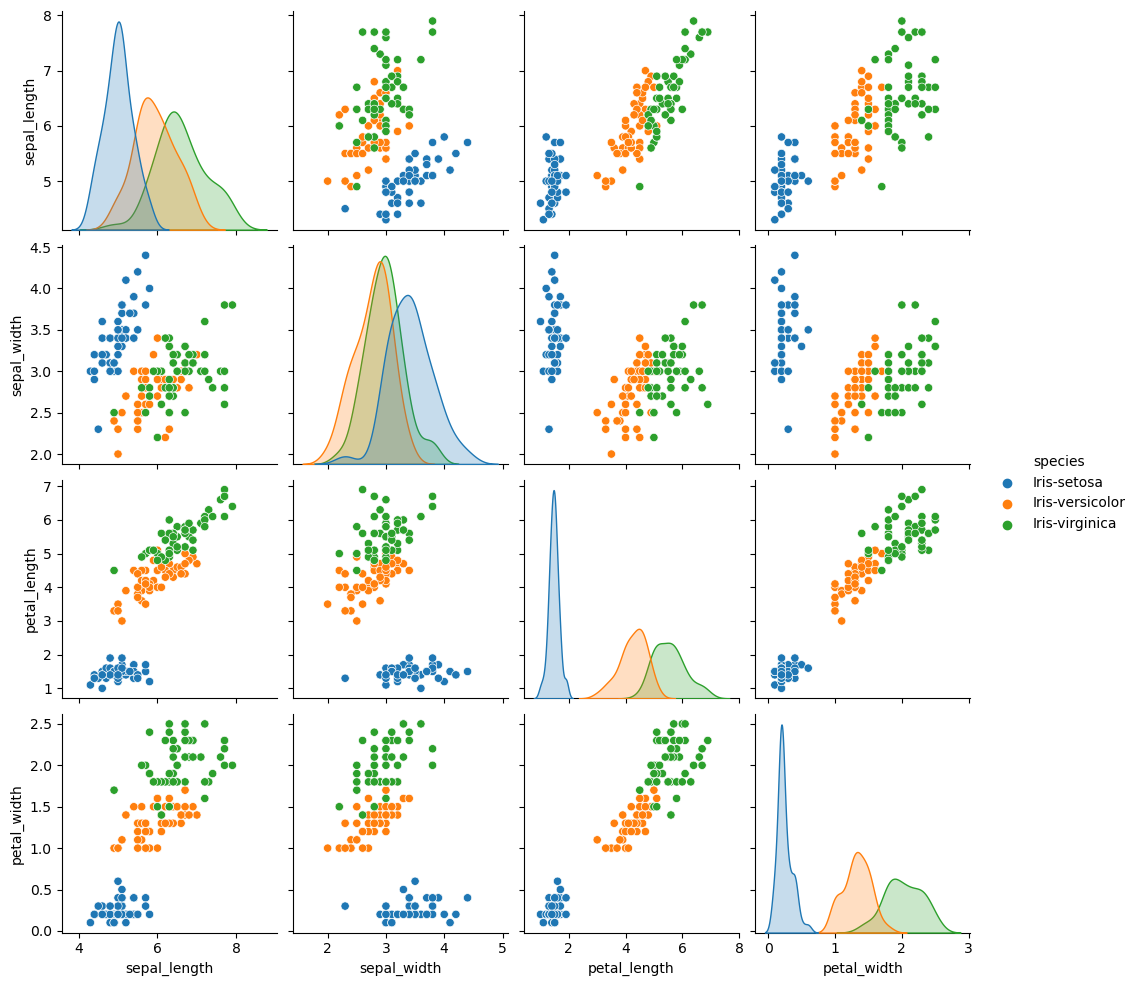

In [8]:
# Plot pairwise relationships in the dataset, with different colors for each species
sns.pairplot(iris, hue='species')
plt.show()


In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(iris.drop('species', axis=1), iris['species'], test_size=0.2, random_state=42)


In [10]:
# Create a Random Forest classifier with 100 decision trees
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
# Train the Random Forest classifier using the training data
rfc.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [11]:
# Make predictions on the testing data
y_pred = rfc.predict(X_test)


In [12]:
# Calculate the accuracy of the model's predictions
accuracy = accuracy_score(y_test, y_pred)
# Generate a confusion matrix to show the performance of the model on each class
cm = confusion_matrix(y_test, y_pred)
# Generate a classification report to show the precision, recall, and F1 score for each class
cr = classification_report(y_test, y_pred)
# Print the accuracy, confusion matrix, and classification report
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix: \n{cm}')
print(f'Classification Report: \n{cr}')


Accuracy: 1.0
Confusion Matrix: 
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report: 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



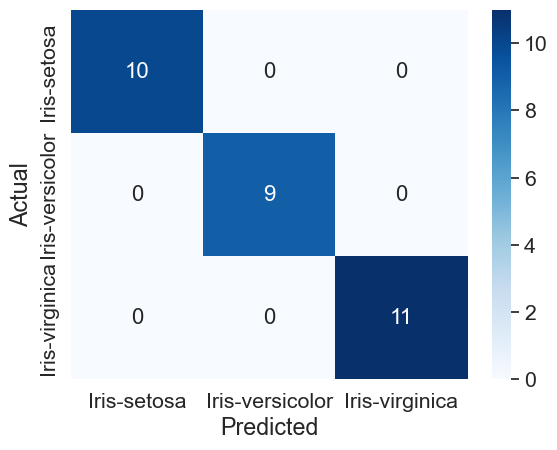

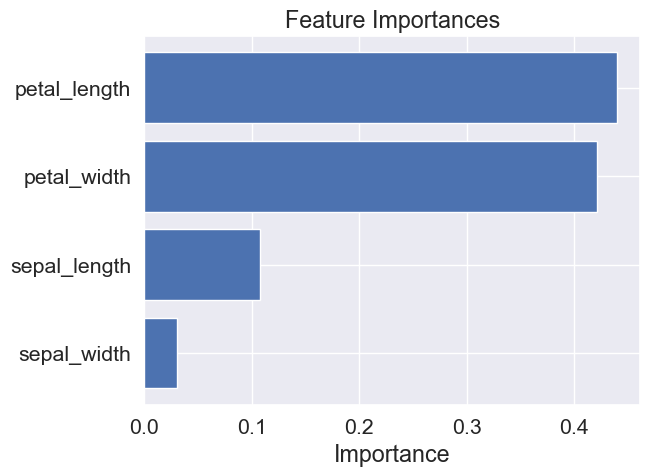

In [13]:
# Generate a heatmap visualization of the confusion matrix
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='Blues', xticklabels=iris['species'].unique(), yticklabels=iris['species'].unique())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Calculate the feature importances of the Random Forest classifier
feature_importances = rfc.feature_importances_
# Get the names of the features
feature_names = iris.drop('species', axis=1).columns
# Sort the features by their importance scores
sorted_idx = feature_importances.argsort()

# Create a bar plot of feature importances
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx])
plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

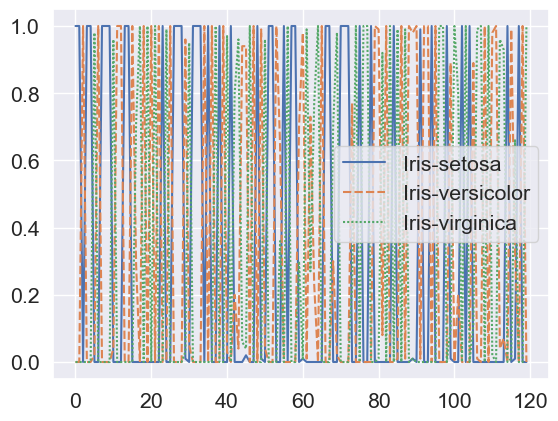

In [14]:
# Generate a line plot of the predicted probabilities for each class on the training data
sns.lineplot(data=pd.DataFrame(rfc.predict_proba(X_train), columns=y_train.unique()).assign(y_train=y_train), linewidth=1.5)
plt.show()

In [15]:
# Save the trained model to a file
joblib.dump(rfc, 'random_forest_model.pkl')

['random_forest_model.pkl']